#VQE and quantum chemistry

On a quantum chemistry we can make hamiltonian using pauli operators and solve it using VQE. On a chemistry the advanced research on ansatz is done better than other problems and many researchers are working on this problem.

##2-3-1 Install
We need to install blueqat, openfermionblueqat and openfermion.

In [1]:
!pip3 install blueqat openfermionblueqat openfermion

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 634kB 6.6MB/s 
  Created wheel for openfermion: filename=openfermion-0.10.0-cp36-none-any.whl size=731375 sha256=a6a7b18652f246d94640f5fa1a2a85b9d71d28a0ea20032213626d14f8ed3f0f
  Stored in directory: /root/.cache/pip/wheels/3c/49/cd/098bb337ffcbb70021864403773043df332c065590873f1813
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-cp36-none-any.whl size=13825 sha256=6f935bbf877c8746569afa0d242dedb965bea20387048f6839b9f8ef47d91339
  Stored in directory: /root/.cache/pip/wheels/10/4d/51/6b843681a9a5aef35f0d0fbce243de46f85080036e16118752
Successfully built openfermion pubchempy


##2-3-2 Coding
Here we use a prepared data provided by openfermion.

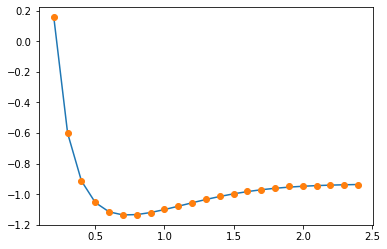

In [1]:
from blueqat import *
from openfermion import *
from openfermionblueqat import*
import numpy as np

def get_molecule(bond_len):
  geometry = [('H',(0.,0.,0.)),('H',(0.,0.,bond_len))]

  description = format(bond_len)
  molecule = MolecularData(geometry, "sto-3g",1,description=description)

  molecule.load()
  return molecule

x = [];e=[];fullci=[]
for bond_len in np.arange(0.2,2.5,0.1):
  m = get_molecule("{:.2}".format(bond_len))
  h = bravyi_kitaev(get_fermion_operator(m.get_molecular_hamiltonian()))
  runner = vqe.Vqe(UCCAnsatz(h,6,Circuit().x[0]))
  result = runner.run()
  x.append(bond_len)
  e.append(runner.ansatz.get_energy_sparse(result.circuit))
  fullci.append(m.fci_energy)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,fullci)
plt.plot(x,e,"o")

We got a result on the H2 problem.

##2-3-3 Checking inside the coding
Using MoluculearData function on OpenFermion, we can use prepare data of Sto-3g on H2 molecule.

In [2]:
def get_molecule(bond_len):
  geometry = [('H',(0.,0.,0.)),('H',(0.,0.,bond_len))]

  description = format(bond_len)
  molecule = MolecularData(geometry, "sto-3g",1,description=description)

  molecule.load()
  return molecule

Here we select 0.4 as the bond length between atoms. We get a formulation on second quantization.

In [3]:
m = get_molecule(0.4)
m.get_molecular_hamiltonian()

() 1.322943021475
((0, 1), (0, 0)) -1.4820918858979102
((1, 1), (1, 0)) -1.4820918858979102
((2, 1), (2, 0)) -0.1187350527865787
((3, 1), (3, 0)) -0.1187350527865787
((0, 1), (0, 1), (0, 0), (0, 0)) 0.36843967630348756
((0, 1), (0, 1), (2, 0), (2, 0)) 0.08225771204699692
((0, 1), (1, 1), (1, 0), (0, 0)) 0.36843967630348756
((0, 1), (1, 1), (3, 0), (2, 0)) 0.08225771204699692
((0, 1), (2, 1), (0, 0), (2, 0)) 0.082257712046997
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3626667179796745
((0, 1), (3, 1), (1, 0), (2, 0)) 0.082257712046997
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3626667179796745
((1, 1), (0, 1), (0, 0), (1, 0)) 0.36843967630348756
((1, 1), (0, 1), (2, 0), (3, 0)) 0.08225771204699692
((1, 1), (1, 1), (1, 0), (1, 0)) 0.36843967630348756
((1, 1), (1, 1), (3, 0), (3, 0)) 0.08225771204699692
((1, 1), (2, 1), (0, 0), (3, 0)) 0.082257712046997
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3626667179796745
((1, 1), (3, 1), (1, 0), (3, 0)) 0.082257712046997
((1, 1), (3, 1), (3, 0), (1, 0)) 0.362666717979674

This is not a hamiltonian with pauli operator, so we need a transformation.

##2-3-4 Transformation

Bravi-Kitaev transformation or Jordan–Wigner transformation are famous. Now we use the former BK transformation.

In [4]:
h = bravyi_kitaev(get_fermion_operator(m.get_molecular_hamiltonian()))
print(h)

(0.7407724940116754+0j) [] +
(0.041128856023498556+0j) [X0 Z1 X2] +
(0.041128856023498556+0j) [X0 Z1 X2 Z3] +
(0.041128856023498556+0j) [Y0 Z1 Y2] +
(0.041128856023498556+0j) [Y0 Z1 Y2 Z3] +
(0.23528824284103544+0j) [Z0] +
(0.23528824284103542+0j) [Z0 Z1] +
(0.18133335898983727+0j) [Z0 Z1 Z2] +
(0.18133335898983727+0j) [Z0 Z1 Z2 Z3] +
(0.14020450296633868+0j) [Z0 Z2] +
(0.14020450296633868+0j) [Z0 Z2 Z3] +
(0.18421983815174378+0j) [Z1] +
(-0.45353118471995524+0j) [Z1 Z2 Z3] +
(0.19136084915706864+0j) [Z1 Z3] +
(-0.45353118471995524+0j) [Z2]


Now we got a hamiltonian with pauli operator, now we can solve it with VQE. To solve this efficiently we use UCC theory on ansatz. By using a prepared UCCansatz in blueqat we get,

In [5]:
runner = vqe.Vqe(UCCAnsatz(h,2,Circuit().x[0]))
result = runner.run(verbose = True)

params: [0.70164565 0.11001547] val: -0.5797580164453399
params: [0.70164565 0.11001547] val: -0.5797580164453399
params: [1.70164565 0.11001547] val: 0.6866759852375767
params: [-0.91638835  0.11001547] val: -0.290721644465588
params: [0.70164565 0.11001547] val: -0.5797580164453399
params: [0.08361167 0.11001547] val: -0.8940999003449719
params: [0.08361167 0.11001547] val: -0.8940999003449719
params: [0.08361167 1.11001547] val: -0.19463031566496408
params: [ 0.08361167 -1.50801853] val: 0.3583855877329869
params: [0.08361167 0.11001547] val: -0.8940999003449719
params: [ 0.08361167 -0.50801851] val: -0.709320072764051
params: [0.08361167 0.49198147] val: -0.7381515159460594
params: [0.08361167 0.01236402] val: -0.8991130288137822
params: [-0.5344223  -0.08528742] val: -0.7059118687677622
params: [0.08361167 0.01236402] val: -0.8991130288137822
params: [-0.5344223  -0.08528742] val: -0.7059118687677622
params: [1.08361166 0.17036738] val: -0.24407758400920698
params: [0.08361167 0.0

After the optimizing process we get the minimized result. This time we use UCC ansatz with Hamiltonian.

In [6]:
runner.ansatz.get_energy_sparse(result.circuit)

-0.9043613509785144

Again this is the whole code for H2 UCCansatz

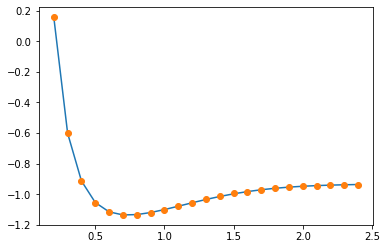

In [7]:
from blueqat import *
from openfermion import *
from openfermionblueqat import*
import numpy as np

def get_molecule(bond_len):
  geometry = [('H',(0.,0.,0.)),('H',(0.,0.,bond_len))]

  description = format(bond_len)
  molecule = MolecularData(geometry, "sto-3g",1,description=description)

  molecule.load()
  return molecule

x = [];e=[];fullci=[]
for bond_len in np.arange(0.2,2.5,0.1):
  m = get_molecule("{:.2}".format(bond_len))
  h = bravyi_kitaev(get_fermion_operator(m.get_molecular_hamiltonian()))
  runner = vqe.Vqe(UCCAnsatz(h,6,Circuit().x[0]))
  result = runner.run()
  x.append(bond_len)
  e.append(runner.ansatz.get_energy_sparse(result.circuit))
  fullci.append(m.fci_energy)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,fullci)
plt.plot(x,e,"o")